# Exploratory Data Analysis of final project dataset used to determine the most appropriate ML model to be applied.
-By Maximilian Klimko 

In [1]:
#Importing packages to cover all bases
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model, model_selection, metrics
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
import graphviz
%matplotlib inline

In [2]:
#importing and reading data using Pandas
data = 'C:/Users/maxkl/Desktop/forked_repo/course_assignments/project-final/heart.csv'
heartdata = pd.read_csv(data, error_bad_lines=False)

In [3]:
#renaming columns 
heartdata.rename(columns={'Age':"Age", 'Sex':"Sex", 'ChestPainType':"CPT", 'RestingBP':"RBP", 'Cholesterol':"CTL", 'FastingBS':"FBS",
       'RestingECG':"ECG", 'MaxHR':"MHR", 'ExerciseAngina':"ExA", 'Oldpeak':"Old", 'ST_Slope':"STS",
       'HeartDisease':"HD"}, inplace=True)
heartdata.head()

,Age,Sex,CPT,RBP,CTL,FBS,ECG,MHR,ExA,Old,STS,HD
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


 Age: 
 in Years

 Sex: 
 M: Male, F: Female

 CPT: 
 TA - Typical Angina
 ATA - Atypical Angina
 NAP - Non-Anginal Pain
 ASY - Asymptomatic

 RBP: resting blood pressure [mm Hg]

 CTL: serum cholesterol [mm/dl]

 FBS: fasting blood sugar 
 [1: if FastingBS > 120 mg/dl, 0: otherwise]

 ECG: resting electrocardiogram results 
 Normal: Normal
 ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or    depression of > 0.05 mV) 
 LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

 MHR: maximum heart rate achieved 
 Numeric value between 60 and 202

 ExA: exercise-induced angina 
 Y: Yes, N: No

 Old: 
ST [Numeric value measured in depression, implies restriction of bloodflow to tissue]

 STS: the slope of the peak exercise ST segment 
 [Up: upsloping, Flat: flat, Down: downsloping]

 HeartDisease: target variable 1: yes, 0: no


# Initial EDA

In [4]:
heartdata.shape

(918, 12)

In [5]:
heartdata.columns

Index(['Age', 'Sex', 'CPT', 'RBP', 'CTL', 'FBS', 'ECG', 'MHR', 'ExA', 'Old',
       'STS', 'HD'],
      dtype='object')

In [6]:
heartdata.index

RangeIndex(start=0, stop=918, step=1)

In [7]:
heartdata.nunique()

Age     50
Sex      2
CPT      4
RBP     67
CTL    222
FBS      2
ECG      3
MHR    119
ExA      2
Old     53
STS      3
HD       2
dtype: int64

In [8]:
heartdata.describe()

,Age,RBP,CTL,FBS,MHR,Old,HD
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# Decision tree to assess feature importance

In [13]:
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier

treeclf = DecisionTreeClassifier(max_depth=3, random_state=50)

feature_cols = ['Age', 'RBP', 'CTL', 'FBS', 'MHR']

X = heartdataclean[feature_cols]
y = heartdataclean.HD

treeclf.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=50)

In [14]:
pd.DataFrame(
    {'feature':feature_cols, 'importance':treeclf.feature_importances_}
).sort_values("importance", ascending=False)

,feature,importance
4,MHR,0.640681
0,Age,0.272739
1,RBP,0.067089
2,CTL,0.019491
3,FBS,0.000000


## Checking for CTL correlation with HD in highest value patients, both M and F 

In [15]:
print(heartdata[(heartdata["Sex"] == "M") & (heartdata["CTL"] > 350)].sort_values("CTL", ascending=False).shape)
heartdata[(heartdata["Sex"] == "M") & (heartdata["CTL"] > 350)].sort_values("CTL", ascending=False).head(10)

(16, 12)


,Age,Sex,CPT,RBP,CTL,FBS,ECG,MHR,ExA,Old,STS,HD
149,54,M,ASY,130,603,1,Normal,125,Y,1.0,Flat,1
76,32,M,ASY,118,529,0,Normal,130,N,0.0,Flat,1
30,53,M,NAP,145,518,0,Normal,130,N,0.0,Flat,1
250,44,M,ASY,135,491,0,Normal,135,N,0.0,Flat,1
103,40,M,ASY,120,466,1,Normal,152,Y,1.0,Flat,1
496,58,M,ASY,132,458,1,Normal,69,N,1.0,Down,0
69,44,M,ASY,150,412,0,Normal,170,N,0.0,Up,0
182,52,M,ASY,140,404,0,Normal,124,Y,2.0,Flat,1
132,56,M,ASY,170,388,0,ST,122,Y,2.0,Flat,1
613,58,M,ASY,140,385,1,LVH,135,N,0.3,Up,0


In [16]:
print(heartdata[(heartdata["Sex"] == "F") & (heartdata["CTL"] > 350)].sort_values("CTL", ascending=False).shape)
heartdata[(heartdata["Sex"] == "F") & (heartdata["CTL"] > 350)].sort_values("CTL", ascending=False).head(10)

(11, 12)


,Age,Sex,CPT,RBP,CTL,FBS,ECG,MHR,ExA,Old,STS,HD
616,67,F,NAP,115,564,0,LVH,160,N,1.6,Flat,0
28,53,F,ATA,113,468,0,Normal,127,N,0.0,Up,0
667,65,F,NAP,140,417,1,LVH,157,N,0.8,Up,0
796,56,F,ASY,134,409,0,LVH,150,Y,1.9,Flat,1
624,63,F,ASY,150,407,0,LVH,154,N,4.0,Flat,1
256,55,F,ATA,130,394,0,LVH,150,N,0.0,Up,0
803,62,F,ASY,140,394,0,LVH,157,N,1.2,Flat,0
123,58,F,ATA,180,393,0,Normal,110,Y,1.0,Flat,1
102,40,F,ASY,150,392,0,Normal,130,N,2.0,Flat,1
738,65,F,NAP,160,360,0,LVH,151,N,0.8,Up,0


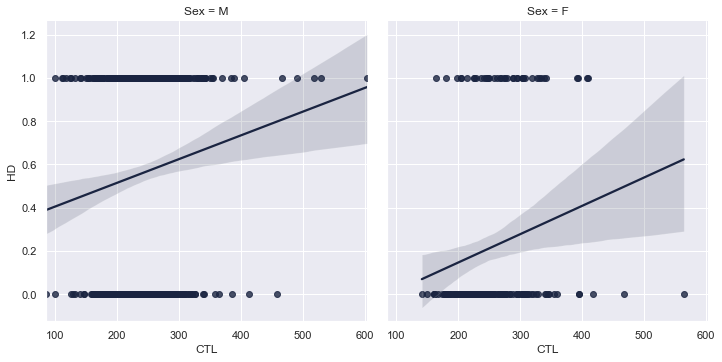

In [17]:
#removed 0 values in Cholesterol column and saved to "no_chol"
no_chol = heartdata[heartdata["CTL"] > 0]
#plotted up the correlation between CLT and HD in men and women separately 
#there seems to be a positive correlation in both men and women
sns.set_theme(style='darkgrid', palette='cubehelix')
sns.lmplot(data=no_chol,x="CTL", y= "HD", col= "Sex");

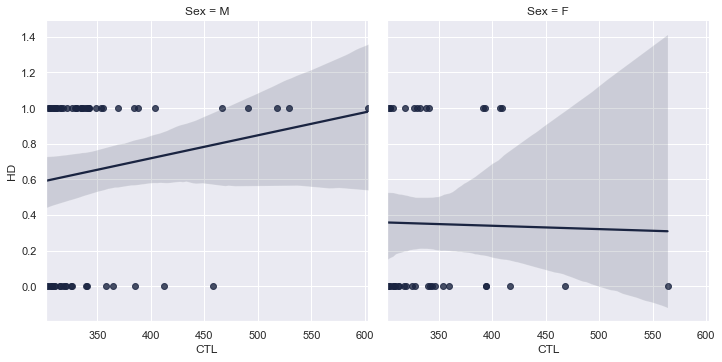

In [18]:
#this plot shows that the men in this dataset have higher cholesterol levels than women
#and also suffer more from heart disease at higher levels of cholesterol
sns.lmplot(data=heartdata[heartdata["CTL"] > 300], x="CTL", y= "HD", col= "Sex");

# Checking for correlation between Age and HD in M and F

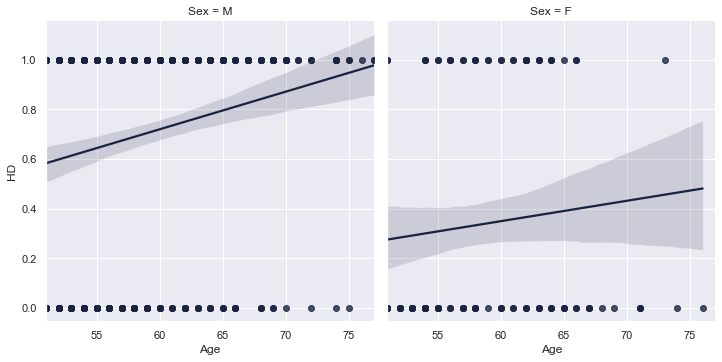

In [19]:
#Age seems to be a factor in predicting heart disease, moreso in men than women.
sns.lmplot(data=heartdata[heartdata["Age"] > 50], x="Age", y= "HD", col= "Sex");

# Checking for correlation between Max Heart Rate and HD in M and F

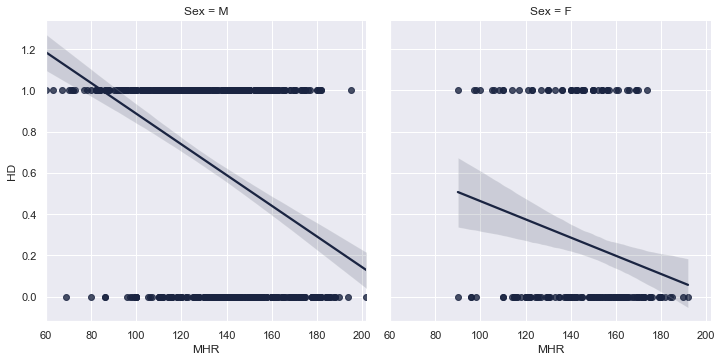

In [20]:
#clear negative correlation between Max heart rate and heart disease
sns.lmplot(data=heartdata, x="MHR", y= "HD", col= "Sex");

# Checking for correlation between Resting Blood Pressure and HD
# in M and F

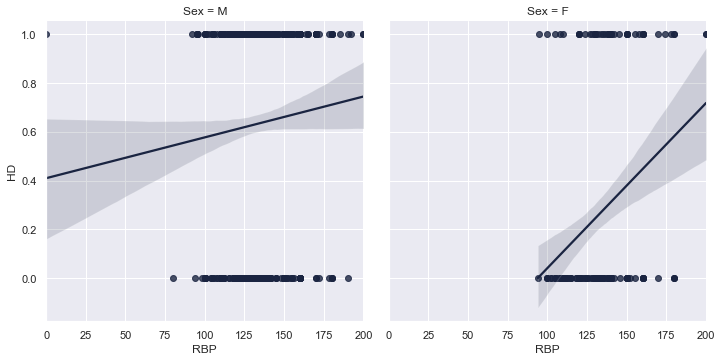

In [21]:
sns.lmplot(data=heartdata, x="RBP", y= "HD", col= "Sex");

In [11]:
#there are 172 0 values for CTL in this dataset so I filtered them and saved the result as a new dataframe 
print(heartdata[["CTL"]].value_counts())
heartdataclean = heartdata[(heartdata.CTL) > 0]

CTL
0      172
254     11
223     10
220     10
211      9
      ... 
117      1
123      1
131      1
293      1
603      1
Length: 222, dtype: int64


In [12]:
heartdataclean.CTL.value_counts().sort_values()

603     1
407     1
529     1
409     1
518     1
       ..
204     9
230     9
220    10
223    10
254    11
Name: CTL, Length: 221, dtype: int64

# Logistic Regression
### I chose logistic regression as this is a classification problem, but mainly because the data set is not very large.
### I chose CTL, MHR and Age as the features

In [22]:
#Instantiating the class
lr = LogisticRegression()

#setting feature and target variables
X = heartdataclean[["CTL", "MHR", "Age"]]
y = heartdataclean.HD

#train test split
X_train, X_test, y_train, y_test = train_test_split(X,y)

#fitting the model
lr.fit(X_train, y_train)

#setting test and train predictions
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

In [23]:
#predicting the probability of HD(0 or 1) using mean feature values and manually selected values.
y_pred_prob_test = lr.predict_proba(
    np.array([heartdataclean.CTL.mean(),heartdataclean.MHR.mean(),heartdataclean.Age.mean()]).reshape(1,-1))
print(f"Probability of predicting the above mentioned feature values(0 or 1):{y_pred_prob_test}")

y_pred_prob_test2 = lr.predict_proba(
    np.array([450,130,50]).reshape(1,-1))
print(f"Probability of predicting the above mentioned feature values(0 or 1):{y_pred_prob_test2}")

Probability of predicting the above mentioned feature values(0 or 1):[[0.52894896 0.47105104]]
Probability of predicting the above mentioned feature values(0 or 1):[[0.32617195 0.67382805]]


In [24]:
lr.score(X_train, y_train)

0.6976744186046512

In [25]:
lr.score(X_test, y_test)

0.7005347593582888

In [26]:
#almost a 50/50 split between target classes
heartdataclean.HD.value_counts()

0    390
1    356
Name: HD, dtype: int64

In [27]:
#producing a confusion matrix
#TN FP
#FN TP
metrics.confusion_matrix(y_test, y_pred_test)

array([[63, 31],
       [25, 68]], dtype=int64)

In [28]:
#calculating the accuracy: TP+TN/Total
print(f"Accuracy: {(72+57)/(72+25+33+57)}")
#calculating the precision: TP/(TP+FP)
print(f"Precision: {metrics.precision_score(y_test, y_pred_test)}")
#calculating the recall: TP/(TP+FN)
print(f"Recall: {metrics.recall_score(y_test, y_pred_test)}")
#calculating the false positives rate: FP/actual no 
print(f"FP Rate: {25/(25+75)}")
print(f"F1 Harmonic mean: {(2 * (0.6829268292682927 * 0.6222222222222222))/ (0.6829268292682927 + 0.6222222222222222)}")

Accuracy: 0.6898395721925134
Precision: 0.6868686868686869
Recall: 0.7311827956989247
FP Rate: 0.25
F1 Harmonic mean: 0.6511627906976744


In [29]:
logit_pred_proba = lr.predict_proba(X_test)[:,1]
logit_pred_proba

array([0.31094   , 0.54922781, 0.52367971, 0.40167398, 0.87977383,
       0.67880325, 0.29026938, 0.72410554, 0.51679931, 0.1041937 ,
       0.63771515, 0.78984012, 0.38833889, 0.69800029, 0.31546559,
       0.47400913, 0.6799079 , 0.28482406, 0.70290158, 0.11695181,
       0.64192901, 0.22273085, 0.57722357, 0.16046152, 0.38638253,
       0.32958119, 0.75869952, 0.38975982, 0.85019696, 0.44669122,
       0.43323505, 0.61433225, 0.73358992, 0.77432143, 0.52479695,
       0.14064069, 0.38309245, 0.78231633, 0.12584114, 0.9011615 ,
       0.40101323, 0.83436208, 0.54852467, 0.56136608, 0.26470116,
       0.9285277 , 0.18356512, 0.50809443, 0.80459086, 0.58341004,
       0.11924901, 0.80554095, 0.74875606, 0.7844782 , 0.36115557,
       0.2383094 , 0.75504694, 0.6335088 , 0.60300164, 0.60616239,
       0.36909006, 0.62342805, 0.40736627, 0.42698012, 0.69404071,
       0.50243399, 0.25629384, 0.14764132, 0.78588726, 0.51760527,
       0.62926267, 0.48792124, 0.23929482, 0.63976575, 0.33891

C:\Users\maxkl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\maxkl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


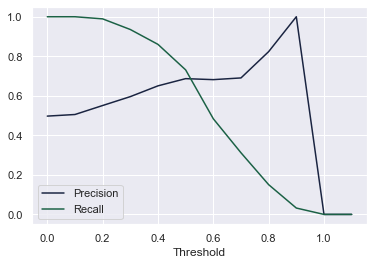

In [30]:
#plotting the precision and recall of the model based on threshold applied

precisions = []
recalls = []
thresholds = []
for threshold in [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1]:
    precisions.append(metrics.precision_score(y_test, logit_pred_proba > threshold))
    recalls.append(metrics.recall_score(y_test, logit_pred_proba > threshold))
    thresholds.append(threshold)
    
precisions, recalls, thresholds

plt.plot(thresholds, precisions, label="Precision")
plt.plot(thresholds, recalls, label="Recall")
plt.legend();
plt.xlabel("Threshold");

# Given that this model is supposed to predict heart disease, it is better to have a higher rate of False Positives than False Negatives, so higher recall is desirable. Without wanting to impair precision too much, a threshold of 0.5 seems to be bearable but could easily be lowered to 0.3 or even 0.2 